In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## BT1

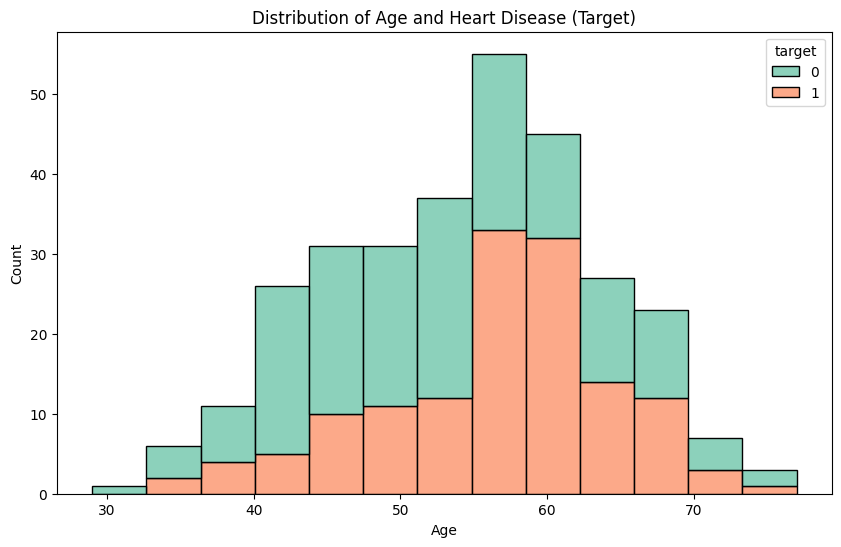

In [3]:
# Load the uploaded dataset
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Map target to binary classification (1 for any heart disease, 0 for no heart disease)
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Fill missing values in 'thal' and 'ca' columns
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Plot distribution of age vs target (heart disease)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=False, palette='Set2')

# Display the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age and Heart Disease (Target)')
plt.show()

## BT2

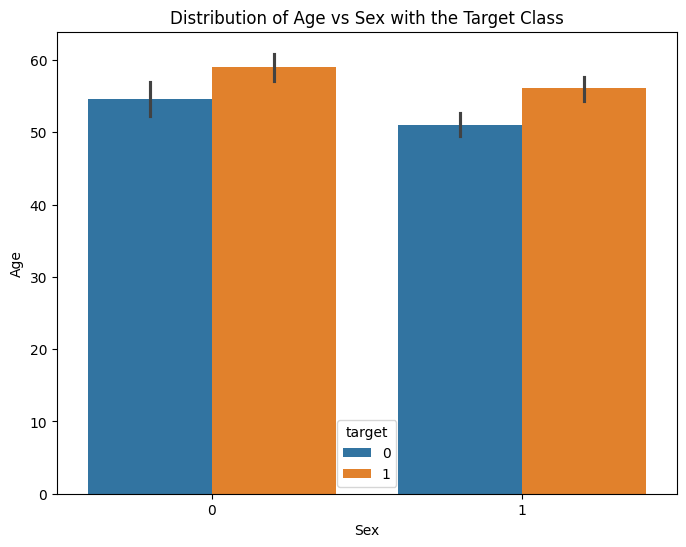

In [5]:
# Generate the correct barplot of age vs sex with hue = target

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='age', hue='target')

# Adjust plot labels and title
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age vs Sex with the Target Class')

# Show the plot
plt.show()

## BT3

In [6]:
# Preparing the data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the KNeighborsClassifier with the given parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Fitting the model on the training set
knn.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculating confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculating accuracy for both training and test sets
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## BT4

In [7]:
# Initializing the Support Vector Classifier with the given parameters
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fitting the model on the training set
svm_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_svm = svm_classifier.predict(X_train)
y_test_pred_svm = svm_classifier.predict(X_test)

# Calculating confusion matrices for SVM
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm)
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Calculating accuracy for both training and test sets
accuracy_for_train_svm = np.round((cm_train_svm[0][0] + cm_train_svm[1][1]) / len(y_train), 2)
accuracy_for_test_svm = np.round((cm_test_svm[0][0] + cm_test_svm[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for SVM = {accuracy_for_train_svm}')
print(f'Accuracy for test set for SVM = {accuracy_for_test_svm}')

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


## BT5

In [8]:
# Initializing the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fitting the model on the training set
naive_bayes_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_nb = naive_bayes_classifier.predict(X_train)
y_test_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculating confusion matrices for Naive Bayes
cm_train_nb = confusion_matrix(y_train, y_train_pred_nb)
cm_test_nb = confusion_matrix(y_test, y_test_pred_nb)

# Calculating accuracy for both training and test sets
accuracy_for_train_nb = np.round((cm_train_nb[0][0] + cm_train_nb[1][1]) / len(y_train), 2)
accuracy_for_test_nb = np.round((cm_test_nb[0][0] + cm_test_nb[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for Naive Bayes = {accuracy_for_train_nb}')
print(f'Accuracy for test set for Naive Bayes = {accuracy_for_test_nb}')

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


## BT6

In [9]:
# Initializing the Decision Tree classifier with the given parameters
decision_tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Fitting the model on the training set
decision_tree_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_dt = decision_tree_classifier.predict(X_train)
y_test_pred_dt = decision_tree_classifier.predict(X_test)

# Calculating confusion matrices for Decision Tree
cm_train_dt = confusion_matrix(y_train, y_train_pred_dt)
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Calculating accuracy for both training and test sets
accuracy_for_train_dt = np.round((cm_train_dt[0][0] + cm_train_dt[1][1]) / len(y_train), 2)
accuracy_for_test_dt = np.round((cm_test_dt[0][0] + cm_test_dt[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for Decision Tree = {accuracy_for_train_dt}')
print(f'Accuracy for test set for Decision Tree = {accuracy_for_test_dt}')

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


## BT7

In [10]:
# Initializing the Random Forest classifier with the given parameters
random_forest_classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, 
                                                  n_estimators=10, random_state=42)

# Fitting the model on the training set
random_forest_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_rf = random_forest_classifier.predict(X_train)
y_test_pred_rf = random_forest_classifier.predict(X_test)

# Calculating confusion matrices for Random Forest
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Calculating accuracy for both training and test sets
accuracy_for_train_rf = np.round((cm_train_rf[0][0] + cm_train_rf[1][1]) / len(y_train), 2)
accuracy_for_test_rf = np.round((cm_test_rf[0][0] + cm_test_rf[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for Random Forest = {accuracy_for_train_rf}')
print(f'Accuracy for test set for Random Forest = {accuracy_for_test_rf}')

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


## BT8

In [11]:
# Initializing the AdaBoost classifier with the given parameters
adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Fitting the model on the training set
adaboost_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_ab = adaboost_classifier.predict(X_train)
y_test_pred_ab = adaboost_classifier.predict(X_test)

# Calculating confusion matrices for Adaboost
cm_train_ab = confusion_matrix(y_train, y_train_pred_ab)
cm_test_ab = confusion_matrix(y_test, y_test_pred_ab)

# Calculating accuracy for both training and test sets
accuracy_for_train_ab = np.round((cm_train_ab[0][0] + cm_train_ab[1][1]) / len(y_train), 2)
accuracy_for_test_ab = np.round((cm_test_ab[0][0] + cm_test_ab[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for Adaboost = {accuracy_for_train_ab}')
print(f'Accuracy for test set for Adaboost = {accuracy_for_test_ab}')

Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


/home/fantashi099/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## BT9

In [12]:
# Initializing the Gradient Boosting classifier with the given parameters
gradient_boost_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                                       min_samples_split=2, max_depth=3, random_state=42)

# Fitting the model on the training set
gradient_boost_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_gb = gradient_boost_classifier.predict(X_train)
y_test_pred_gb = gradient_boost_classifier.predict(X_test)

# Calculating confusion matrices for Gradient Boosting
cm_train_gb = confusion_matrix(y_train, y_train_pred_gb)
cm_test_gb = confusion_matrix(y_test, y_test_pred_gb)

# Calculating accuracy for both training and test sets
accuracy_for_train_gb = np.round((cm_train_gb[0][0] + cm_train_gb[1][1]) / len(y_train), 2)
accuracy_for_test_gb = np.round((cm_test_gb[0][0] + cm_test_gb[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for GradientBoost = {accuracy_for_train_gb}')
print(f'Accuracy for test set for GradientBoost = {accuracy_for_test_gb}')

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


## BT10

In [14]:
# Initializing the XGBoost classifier with the given parameters
xgboost_classifier = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)

# Fitting the model on the training set
xgboost_classifier.fit(X_train, y_train)

# Predicting the results for both the training and test sets
y_train_pred_xgb = xgboost_classifier.predict(X_train)
y_test_pred_xgb = xgboost_classifier.predict(X_test)

# Calculating confusion matrices for XGBoost
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Calculating accuracy for both training and test sets
accuracy_for_train_xgb = np.round((cm_train_xgb[0][0] + cm_train_xgb[1][1]) / len(y_train), 2)
accuracy_for_test_xgb = np.round((cm_test_xgb[0][0] + cm_test_xgb[1][1]) / len(y_test), 2)

# Printing the accuracy
print(f'Accuracy for training set for XGboost = {accuracy_for_train_xgb}')
print(f'Accuracy for test set for XGboost = {accuracy_for_test_xgb}')

Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


## BT11

In [16]:
# Initialize base models
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42, probability=True)  # SVC requires probability=True for stacking
ad = AdaBoostClassifier(random_state=42)

# Define the stacking model
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', dtc),
        ('rf', rfc),
        ('knn', knn),
        ('xgb', xgb),
        ('gb', gc),
        ('svc', svc),
        ('ad', ad)
    ],
    final_estimator=RandomForestClassifier(random_state=42)  # You can choose any final estimator
)

# Fit the stacking model
stacking_clf.fit(X_train, y_train)

# Predict using the stacking model
y_train_pred_stacking = stacking_clf.predict(X_train)
y_test_pred_stacking = stacking_clf.predict(X_test)

# Calculate confusion matrices
cm_train_stacking = confusion_matrix(y_train, y_train_pred_stacking)
cm_test_stacking = confusion_matrix(y_test, y_test_pred_stacking)

# Calculate accuracy for both training and test sets
accuracy_for_train_stacking = np.round((cm_train_stacking[0][0] + cm_train_stacking[1][1]) / len(y_train), 2)
accuracy_for_test_stacking = np.round((cm_test_stacking[0][0] + cm_test_stacking[1][1]) / len(y_test), 2)

# Print the accuracy
print(f'Accuracy for training set for Stacking = {accuracy_for_train_stacking}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test_stacking}')

/home/fantashi099/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/fantashi099/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/fantashi099/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/fantashi099/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Accuracy for training set for Stacking = 0.99
Accuracy for test set for Stacking = 0.89
